In [1]:
import pandas as pd
import numpy as np
import sklearn.linear_model
import sklearn.ensemble
import sklearn.metrics
import seaborn as sns
import matplotlib.pyplot as plt

### Introduction
This holds data about student health. It has private information about the students personal life, but also holds the students academic information.

In [2]:
df = pd.read_csv("student-health-data.csv")
df.head()

,Unnamed: 0,school,sex,age,address,famsize,mothers-education,fathers-education,mothers-job,fathers-job,...,freetime,goout,weekday-alcohol-consumption,weekend-alcohol-consumption,health,absences,G1,G2,G3,parents-live-together
0,0,GP,F,18.0,urban,>3,4.0,4.0,at_home,teacher,...,3.0,4.0,1.0,1.0,3.0,6.0,5.0,6.0,6.0,False
1,1,GP,F,17.0,urban,>3,NaN,1.0,at_home,other,...,3.0,3.0,1.0,1.0,3.0,4.0,5.0,5.0,6.0,True
2,2,GP,F,15.0,urban,<=3,1.0,1.0,at_home,other,...,3.0,2.0,2.0,3.0,3.0,10.0,7.0,8.0,10.0,True
3,3,GP,F,15.0,urban,>3,4.0,2.0,health,services,...,2.0,2.0,1.0,1.0,5.0,2.0,15.0,14.0,15.0,True
4,4,GP,F,16.0,urban,>3,3.0,3.0,other,other,...,3.0,2.0,1.0,2.0,5.0,4.0,6.0,10.0,NaN,NaN


### Initial data exploration
In this section i will do some initial exploration of the data.

<Axes: xlabel='address,sex'>

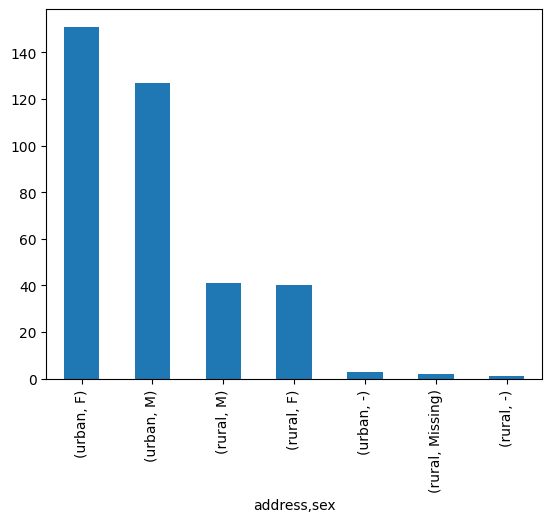

In [3]:
#Check the geographic distribution of the student body presented in the data.
gepgraphic_sex = df[["address", "sex"]]
gepgraphic_sex.value_counts().plot.bar()


While the distribution of the sexes are normal, there is a large majority of the students who live in urban areas as oppposed to rural areas. 

higher
yes    355
no      19
-        1
Name: count, dtype: int64

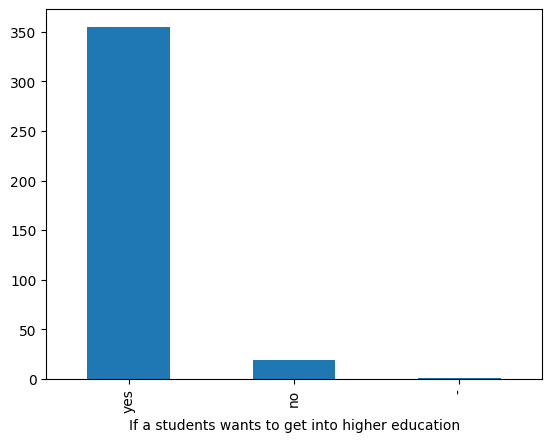

In [4]:
#Checking how many wants to get into heigher education
ax =df["higher"].value_counts().plot.bar()
ax.set_xlabel("If a students wants to get into higher education")
df["higher"].value_counts()


<Axes: xlabel='failures'>

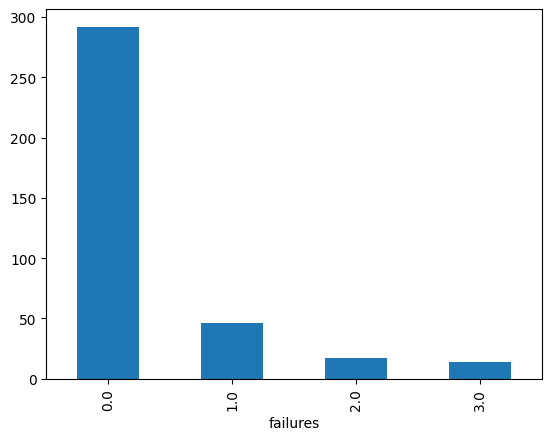

In [5]:
#Check how mmany students have failed an exam before.
df["failures"].value_counts().plot.bar()

In [6]:
#Provides amount of null values in each column.
df.isna().sum()


Unnamed: 0                      0
school                         10
sex                            16
age                            18
address                        15
famsize                        14
mothers-education              20
fathers-education              21
mothers-job                    16
fathers-job                     5
living-distance-from-school    23
studytime                      18
failures                       26
schoolsup                      16
famsup                         16
paid                           13
activities                     16
nursery                        15
higher                         20
internet                       13
romantic                       18
famrel                         20
freetime                       22
goout                          21
weekday-alcohol-consumption    18
weekend-alcohol-consumption    29
health                         23
absences                       14
G1                             17
G2            

### Hypothesis 
I believe that it is possible to determine which factors affects a students academic performance. This includes both overall grades, but also how many times a student have failed an exam. 

### Data preparation
Before starting working with the data, we need to prepare it and handle missing values if necessary.
First we check how many of the values in the dataset is missing.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   395 non-null    int64  
 1   school                       385 non-null    object 
 2   sex                          379 non-null    object 
 3   age                          377 non-null    float64
 4   address                      380 non-null    object 
 5   famsize                      381 non-null    object 
 6   mothers-education            375 non-null    float64
 7   fathers-education            374 non-null    float64
 8   mothers-job                  379 non-null    object 
 9   fathers-job                  390 non-null    object 
 10  living-distance-from-school  372 non-null    float64
 11  studytime                    377 non-null    float64
 12  failures                     369 non-null    float64
 13  schoolsup           

In [8]:
#Get amount of non-null values in the dataset, and calcuate how many percent of the dataset is missing
non_null = np.sum(df.count())
amount_missing = 100-((non_null/(395*32))*100)
amount_missing

4.240506329113927

In [9]:
df[df.isna().any(axis=1)]

,Unnamed: 0,school,sex,age,address,famsize,mothers-education,fathers-education,mothers-job,fathers-job,...,freetime,goout,weekday-alcohol-consumption,weekend-alcohol-consumption,health,absences,G1,G2,G3,parents-live-together
0,0,GP,F,18.0,urban,>3,4.0,4.0,at_home,teacher,...,3.0,4.0,1.0,1.0,3.0,6.0,5.0,6.0,6.0,False
1,1,GP,F,17.0,urban,>3,NaN,1.0,at_home,other,...,3.0,3.0,1.0,1.0,3.0,4.0,5.0,5.0,6.0,True
2,2,GP,F,15.0,urban,<=3,1.0,1.0,at_home,other,...,3.0,2.0,2.0,3.0,3.0,10.0,7.0,8.0,10.0,True
4,4,GP,F,16.0,urban,>3,3.0,3.0,other,other,...,3.0,2.0,1.0,2.0,5.0,4.0,6.0,10.0,NaN,NaN
5,5,GP,M,16.0,urban,<=3,4.0,3.0,services,other,...,NaN,2.0,1.0,2.0,5.0,10.0,15.0,15.0,15.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,387,MS,F,19.0,rural,>3,2.0,3.0,services,other,...,4.0,2.0,1.0,2.0,5.0,0.0,7.0,5.0,0.0,True
389,389,MS,F,18.0,urban,>3,1.0,1.0,other,other,...,1.0,1.0,1.0,1.0,5.0,0.0,6.0,5.0,0.0,NaN
391,391,MS,M,17.0,urban,<=3,3.0,1.0,services,services,...,4.0,5.0,3.0,4.0,2.0,3.0,14.0,16.0,16.0,True
392,392,MS,M,21.0,rural,>3,1.0,1.0,other,other,...,NaN,3.0,3.0,3.0,3.0,3.0,10.0,8.0,7.0,True


As can be seen above, about 4.2% of the data is missing. While this may sound like a lot, the data is missing haphazardly throughout the dataset. Every single column, is affected to some degree with about 4-20 rows being affected in each column which makes it relatively inconsequential.  That is because that there are no single column or two where a lot is missing. Therefore, the general integrity of the data is not compromised, and will not require very advanceed techniques to fill in the missing data. 

Since the data loss is so spread out between the columns, it would not make sense to handle all the missing data at once. Instead i will handle the columns which i explicitly use in my analysis. 

First i will check if students who do not wish to enter higher education has a higher chance of failing exams. To handle missing values, i will use the `bfill` method to fill out missing values with the corresponding values from the next row. 

In [10]:
df["higher"].bfill(axis='rows', inplace=True)
df["failures"].bfill(axis='rows', inplace=True)
df["sex"].bfill(axis='rows', inplace=True)


higher
yes    374
no      20
-        1
Name: count, dtype: int64

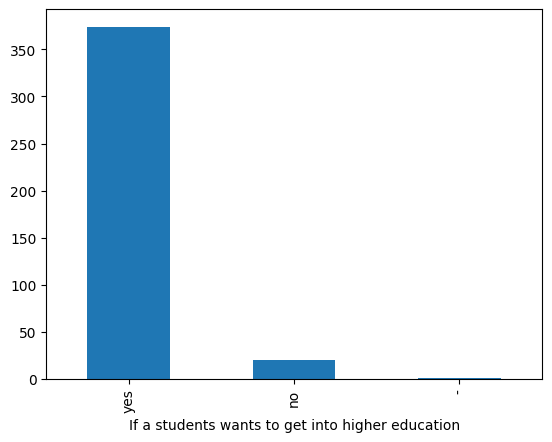

In [11]:
#Checking how many wants to get into heigher education
ax =df["higher"].value_counts().plot.bar()
ax.set_xlabel("If a students wants to get into higher education")
df["higher"].value_counts()

,failures
higher,
no,12
yes,67


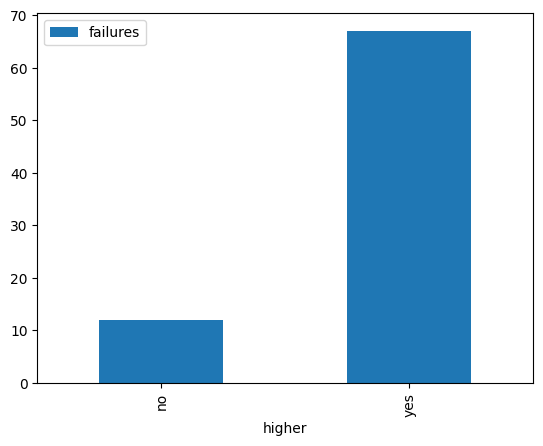

In [12]:
df2 = df.drop(df[df['failures'] == 0].index)
temp =df2[['higher','failures']].groupby('higher').count()
temp.plot.bar()
temp





This gives us some interesting results. While students that do not wish to take higher education only account for about 5.1% of the student body, they account for about 15% of the students who fail atleast 1 exam. This suggests that students who do not wish to proceed with higher education, have poorer academic performance compared to their peers, which supports my hypothesis. 

<Axes: xlabel='sex'>

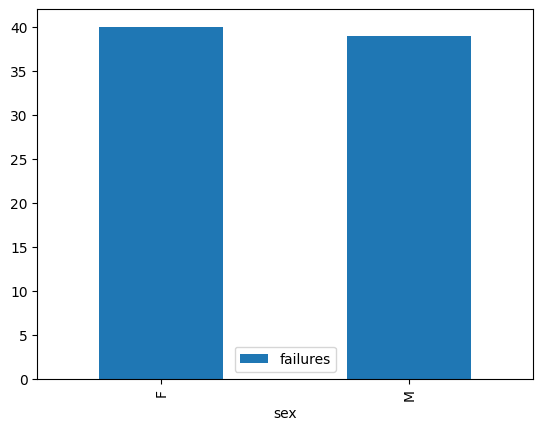

In [13]:
df2[['failures','sex']].groupby('sex').count().plot.bar()

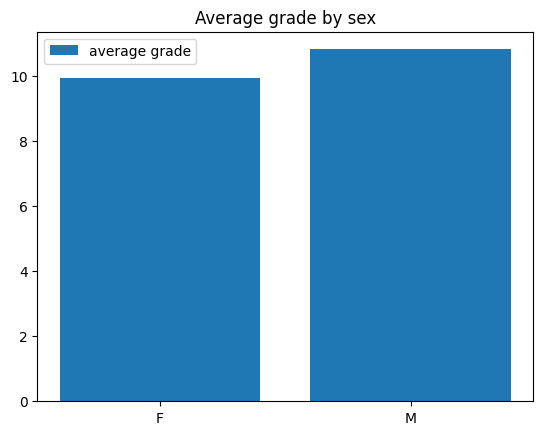

In [14]:
df['G3'].fillna(df['G3'].mean())
fMean = df.loc[df['sex'] == 'F']['G3'].mean()
mMean = df.loc[df['sex'] == 'M']['G3'].mean()
plt.bar(['F', 'M'], [fMean, mMean], label = "average grade")
plt.legend(loc="upper left")
plt.title(label="Average grade by sex")  
plt.show()

As can be seen above there does not seem to be any correlation between the sex of students and their academic performance. The distribution of failed exams and grades are very evenly distributed. According to the data the women has slightly worse grades and fail a few more exams compared to their male counterparts. 

Another interesting statistic to look at is a students weekly alcohol consumption. Alcohol has been shown to have negative effects on the brain, and can inhibit brain growth. It would be interesting to see if this is reflected in the acade

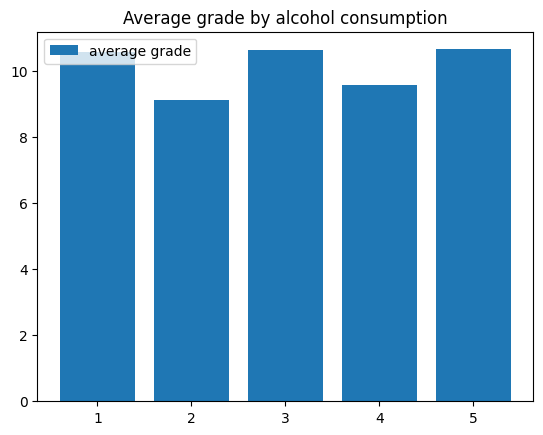

10.666666666666666

In [23]:
df['weekday-alcohol-consumption'].fillna(df['weekday-alcohol-consumption'].mean())
alcohol1 = df.loc[df['weekday-alcohol-consumption'] == 1.0]['G3'].mean()
alcohol2 = df.loc[df['weekday-alcohol-consumption'] == 2.0]['G3'].mean()
alcohol3 = df.loc[df['weekday-alcohol-consumption'] == 3.0]['G3'].mean()
alcohol4 = df.loc[df['weekday-alcohol-consumption'] == 4.0]['G3'].mean()
alcohol5 = df.loc[df['weekday-alcohol-consumption'] == 5.0]['G3'].mean()
plt.bar(['1','2','3','4','5'], [alcohol1,alcohol2,alcohol3,alcohol4,alcohol5], label = "average grade")
plt.legend(loc="upper left")
plt.title("Average grade by alcohol consumption")
plt.show()



<Axes: >

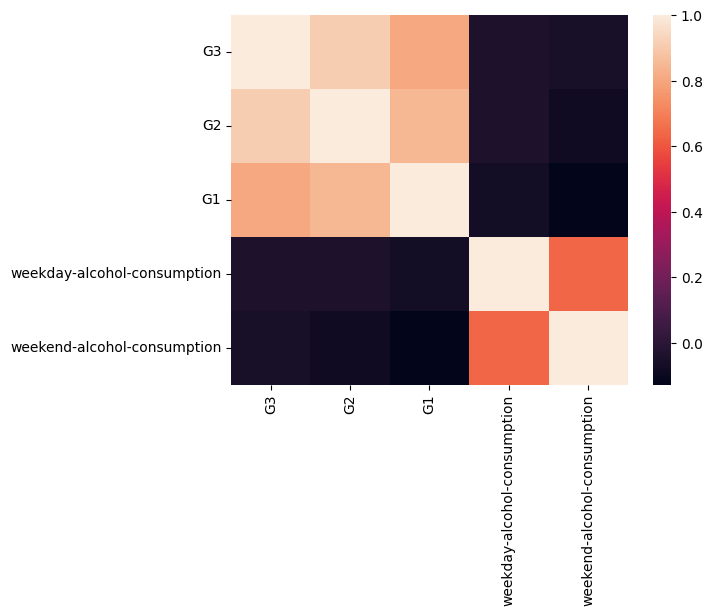

In [26]:
sns.heatmap(df[['G3', 'G2', 'G1', 'weekday-alcohol-consumption', 'weekend-alcohol-consumption']].corr())

As seen above there seems to be no correlation between a students alcohol consumption and their academic performance. Something to keep in mind is that there is a very big difference in the amount of students in each drinking category, so the data is probably not representative.

,Unnamed: 0,school,sex,age,address,famsize,mothers-education,fathers-education,mothers-job,fathers-job,living-distance-from-school,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,weekday-alcohol-consumption,weekend-alcohol-consumption,health,absences,G1,G2,G3,parents-live-together
0,0,GP,F,18.0,urban,>3,4.0,4.0,at_home,teacher,2.0,2.0,0.0,yes,no,no,no,yes,yes,no,no,4.0,3.0,4.0,1.0,1.0,3.0,6.0,5.0,6.0,6.0,False
1,1,GP,F,17.0,urban,>3,NaN,1.0,at_home,other,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5.0,5.0,6.0,True
2,2,GP,F,15.0,urban,<=3,1.0,1.0,at_home,other,1.0,NaN,3.0,yes,no,yes,no,yes,yes,yes,no,4.0,3.0,2.0,2.0,3.0,3.0,10.0,7.0,8.0,10.0,True
3,3,GP,F,15.0,urban,>3,4.0,2.0,health,services,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15.0,14.0,15.0,True
4,4,GP,F,16.0,urban,>3,3.0,3.0,other,other,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,NaN,4.0,3.0,2.0,1.0,2.0,5.0,4.0,6.0,10.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,390,MS,M,20.0,urban,<=3,2.0,2.0,services,services,1.0,2.0,2.0,no,yes,yes,no,yes,yes,no,no,5.0,5.0,4.0,4.0,5.0,4.0,11.0,9.0,9.0,9.0,False
391,391,MS,M,17.0,urban,<=3,3.0,1.0,services,services,NaN,1.0,0.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,3.0,4.0,2.0,3.0,14.0,16.0,16.0,True
392,392,MS,M,21.0,rural,>3,1.0,1.0,other,other,1.0,1.0,0.0,no,no,no,no,no,yes,no,no,5.0,NaN,3.0,3.0,3.0,3.0,3.0,10.0,8.0,7.0,True
393,393,MS,M,18.0,rural,NaN,3.0,2.0,services,other,3.0,1.0,0.0,no,no,no,no,no,yes,yes,no,4.0,4.0,1.0,3.0,4.0,5.0,0.0,11.0,12.0,10.0,True


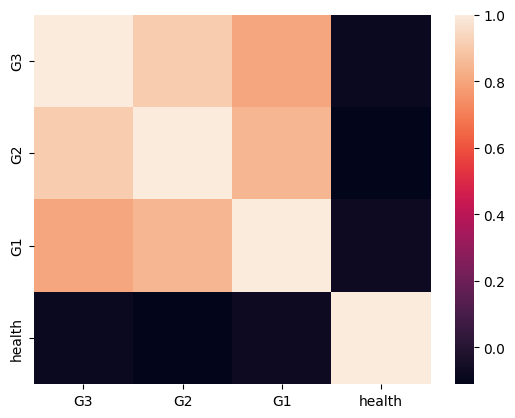

In [30]:
sns.heatmap(df[['G3', 'G2', 'G1', 'health']].corr())
pd.set_option('display.max_columns', None)

display(df)